In [1]:
from google.colab import files

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [3]:
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [4]:
df=pd.read_csv('predictive_maintenance.csv')

In [5]:
df.tail(400)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9600,9601,M24460,M,298.9,310.0,1561,45.3,58,0,No Failure
9601,9602,L56781,L,298.9,310.1,2109,18.0,61,0,No Failure
9602,9603,L56782,L,298.9,310.2,1705,32.5,63,0,No Failure
9603,9604,M24463,M,298.9,310.1,1549,40.2,65,0,No Failure
9604,9605,H39018,H,299.0,310.2,1637,38.0,68,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [6]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [18]:
# Store the mapping of label encoded classes to their original values
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Save the label encoding mapping to a file using pickle
with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)


In [19]:
label_mapping

{0: 'Heat Dissipation Failure',
 1: 'No Failure',
 2: 'Overstrain Failure',
 3: 'Power Failure',
 4: 'Random Failures',
 5: 'Tool Wear Failure'}

In [38]:
# prompt: print df where failure count=2

df.loc[df['Failure Type'] == 3]


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
50,1,298.90,309.10,2861,4.60,143,3
69,1,298.90,309.00,1410,65.70,191,3
168,1,298.40,308.30,1433,62.30,20,3
194,2,298.20,308.50,2678,10.70,86,3
207,2,298.40,308.70,1421,60.70,119,3
...,...,...,...,...,...,...,...
9084,1,297.20,307.90,1326,75.40,172,3
9175,1,297.80,309.00,1403,64.20,0,3
9613,1,299.00,310.20,1377,62.50,92,3
9764,1,298.50,309.50,1294,66.70,12,3


<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

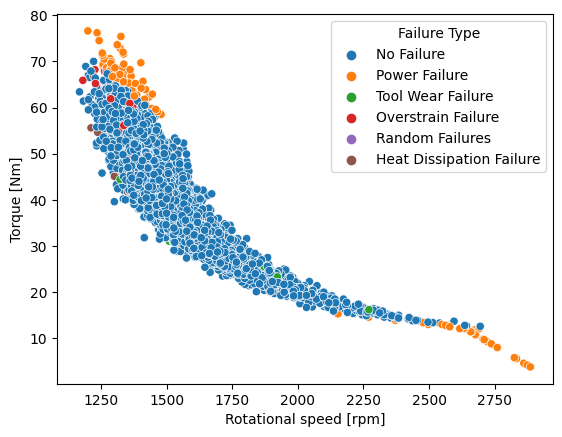

In [8]:
sns.scatterplot(data=df, x=df['Rotational speed [rpm]'],y=df['Torque [Nm]'],hue="Failure Type",palette="tab10")

([<matplotlib.patches.Wedge at 0x7a7352a35ea0>,
 [Text(-1.0934326807119075, 0.12002071800806752, 'No Failure'),
  Text(1.0815383990745098, -0.20068555335984412, 'Heat Dissipation Failure'),
  Text(1.09229385624682, -0.1299774272920172, 'Power Failure'),
  Text(1.097741741822158, -0.07044904727002806, 'Overstrain Failure'),
  Text(1.0996438706546316, -0.027988528573331346, 'Tool Wear Failure'),
  Text(1.0999824126399236, -0.006220279965796285, 'Random Failures')],
 [Text(-0.5964178258428585, 0.06546584618621863, '96.5%'),
  Text(0.5899300358588234, -0.10946484728718768, '1.1%'),
  Text(0.5957966488619018, -0.07089677852291847, '0.9%'),
  Text(0.5987682228120862, -0.03842675305637893, '0.8%'),
  Text(0.599805747629799, -0.015266470130908006, '0.4%'),
  Text(0.5999904068945038, -0.003392879981343428, '0.2%')])

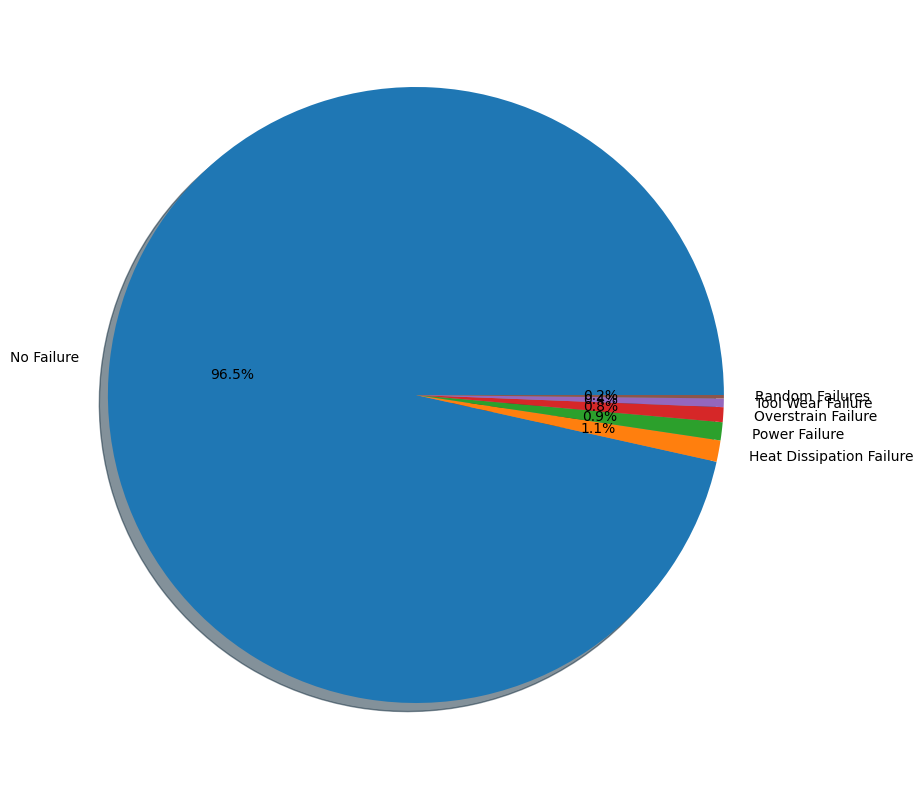

In [9]:
category_counts = df['Failure Type'].value_counts()
plt.figure(figsize=(14, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',shadow=True)

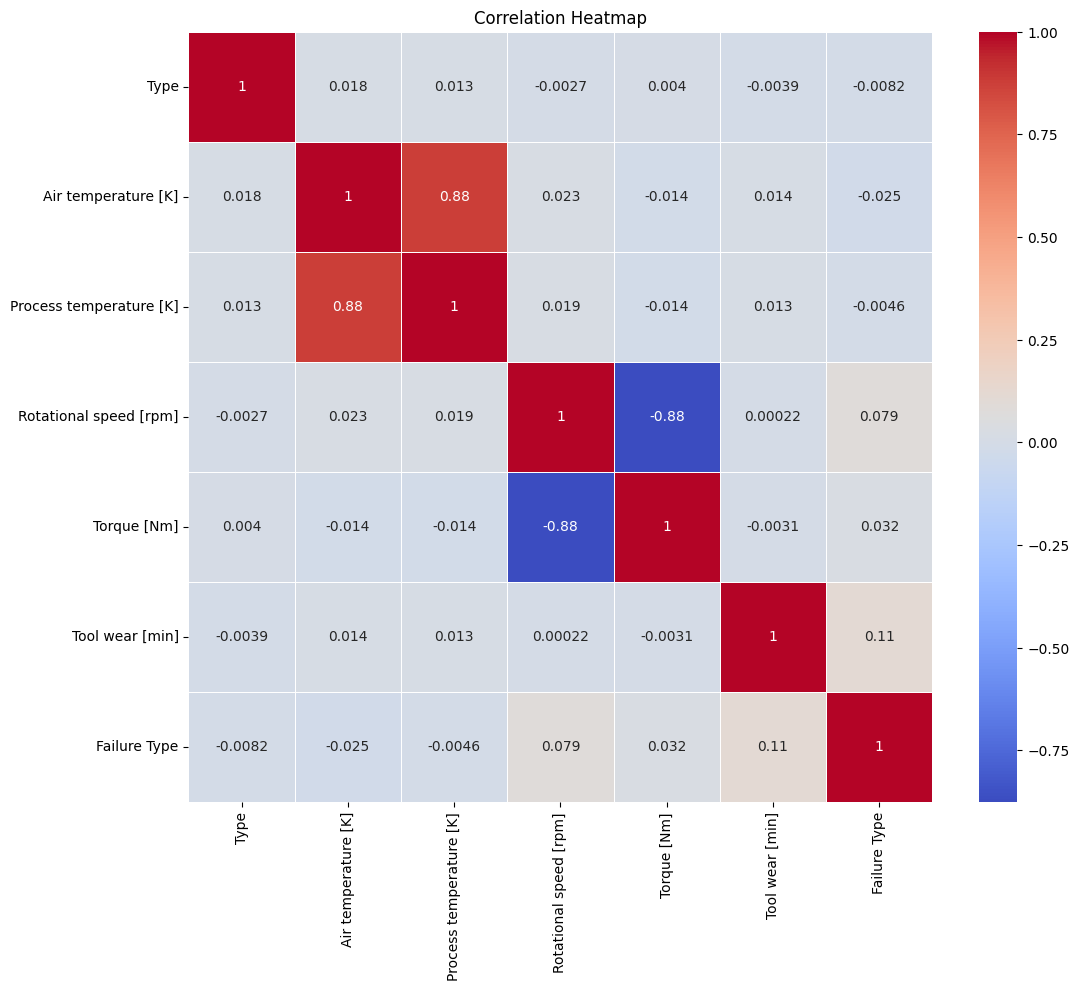

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlation Heatmap")
plt.show()

In [11]:
df.drop(['UDI', 'Product ID','Target'], axis=1, inplace=True)

In [12]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # Checking if the column has 'object' dtype (strings)
        df[column] = label_encoder.fit_transform(df[column])


In [15]:
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

In [21]:
pip install lazypredict


In [22]:
from lazypredict.Supervised import LazyClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


 97%|█████████▋| 28/29 [00:34<00:01,  1.08s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] Start training from score -4.412486
[LightGBM] [Info] Start training from score -0.036016
[LightGBM] [Info] Start training from score -4.812810
[LightGBM] [Info] Start training from score -4.669709
[LightGBM] [Info] Start training from score -6.502290
[LightGBM] [Info] Start training from score -5.460836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

100%|██████████| 29/29 [00:35<00:00,  1.24s/it]


In [25]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.98               0.58    None      0.98   
XGBClassifier                      0.98               0.57    None      0.98   
BaggingClassifier                  0.98               0.57    None      0.98   
NearestCentroid                    0.47               0.56    None      0.61   
DecisionTreeClassifier             0.97               0.55    None      0.97   
QuadraticDiscriminantAnalysis      0.98               0.53    None      0.97   
RandomForestClassifier             0.98               0.50    None      0.98   
GaussianNB                         0.95               0.46    None      0.95   
LabelSpreading                     0.97               0.44    None      0.97   
LabelPropagation                   0.97               0.44    None      0.97   
ExtraTreesClassifier               0.98 

In [41]:

import pickle

# Assuming you have already trained your model and have it stored in 'bst'

# Save the trained model to a file
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)


In [40]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.3 %


In [48]:
import pickle
import numpy as np

# Load the label encoding mapping
with open('label_mapping.pkl', 'rb') as f:
    label_mapping = pickle.load(f)


# Load the saved model using pickle
with open('random_forest.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Input data for prediction
new_input = np.array([[1,298.90,309.10,2861,4.60,143]])  # Assuming a single data point with six features


predictions = loaded_model.predict(new_input)



print(predictions)

predicted_labels_original = [label_mapping[label] for label in predictions]

print(predicted_labels_original)

label_mapping

[3]
['Power Failure']


{0: 'Heat Dissipation Failure',
 1: 'No Failure',
 2: 'Overstrain Failure',
 3: 'Power Failure',
 4: 'Random Failures',
 5: 'Tool Wear Failure'}